## import 库

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt

## 从csv读取DataFrame

In [2]:
ori_path = '/home/esmidth/github/DCS/Sensorscope/luce_stations/'
sub_prefix = 'sensorscope-meteo-'
sub_suffix = '.txt'
file_list = os.listdir(ori_path)
name = [
'Station ID',
'Year',
'Month',
'Day',
'Hour',
'Minute',
'Second',
'Time since the epoch [s]',
'Sequence Number',
'Ambient Temperature',
'Surface Temperature',
'Solar Radiation',
'Relative Humidity [%]',
'Soil Moisture [%]',
'Watermark [kPa]',
'Rain Meter [mm]',
'Wind Speed [m/s]',
'Wind Direction [°]',
]

In [5]:
df_sum = pd.DataFrame()
sum = 0
for file in file_list:
    if '.txt'in file:
        df = pd.read_csv(ori_path+file,sep=' ',names=name)
        df_sum = pd.concat([df_sum,df],axis=0)
        sum += len(df)
        print(file,'Done')

sensorscope-meteo-12.txt Done
sensorscope-meteo-3.txt Done
sensorscope-meteo-106.txt Done
sensorscope-meteo-96.txt Done
sensorscope-meteo-14.txt Done
sensorscope-meteo-121.txt Done
sensorscope-meteo-24.txt Done
sensorscope-meteo-92.txt Done
sensorscope-meteo-17.txt Done
sensorscope-meteo-7.txt Done
sensorscope-meteo-36.txt Done
sensorscope-meteo-85.txt Done
sensorscope-meteo-23.txt Done
sensorscope-meteo-31.txt Done
sensorscope-meteo-59.txt Done
sensorscope-meteo-8.txt Done
sensorscope-meteo-88.txt Done
sensorscope-meteo-94.txt Done
sensorscope-meteo-15.txt Done
sensorscope-meteo-55.txt Done
sensorscope-meteo-35.txt Done
sensorscope-meteo-103.txt Done
sensorscope-meteo-44.txt Done
sensorscope-meteo-37.txt Done
sensorscope-meteo-79.txt Done
sensorscope-meteo-122.txt Done
sensorscope-meteo-62.txt Done
sensorscope-meteo-9.txt Done
sensorscope-meteo-26.txt Done
sensorscope-meteo-84.txt Done
sensorscope-meteo-51.txt Done
sensorscope-meteo-45.txt Done
sensorscope-meteo-50.txt Done
sensorscop

In [6]:
# print(sum,len(df_sum))
# print(df_sum['Station ID'])
print(df_sum.shape)
print(df_sum.info(memory_usage='deep'))

(37916915, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37916915 entries, 0 to 255941
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Station ID                int64  
 1   Year                      float64
 2   Month                     float64
 3   Day                       float64
 4   Hour                      float64
 5   Minute                    float64
 6   Second                    float64
 7   Time since the epoch [s]  float64
 8   Sequence Number           float64
 9   Ambient Temperature       float64
 10  Surface Temperature       float64
 11  Solar Radiation           float64
 12  Relative Humidity [%]     float64
 13  Soil Moisture [%]         float64
 14  Watermark [kPa]           float64
 15  Rain Meter [mm]           float64
 16  Wind Speed [m/s]          float64
 17  Wind Direction [°]        float64
dtypes: float64(17), int64(1)
memory usage: 5.4 GB
None


In [ ]:
df_sum.to_csv('lune.csv',index=False)

In [7]:
df_sum.to_hdf('data.h5',key='df',mode='w')

## 绘制有效数据点

In [8]:
lat = (46.51788,46.52227)
log = (6.56517,6.5693)

In [9]:
loc_file = '/home/esmidth/github/DCS/Sensorscope/EPFL_sensor_loc_simple2.xlsx'
df = pd.read_excel(loc_file)

In [10]:
print(df.columns)

Index(['ID', 'Est', 'Nord', 'Altitude', 'Latitude', 'Longitude'], dtype='object')


In [11]:
lat_range = np.linspace(lat[0],lat[1],11)
log_range = np.linspace(log[0],log[1],11)
print(lat_range)
print(log_range)

[46.51788  46.518319 46.518758 46.519197 46.519636 46.520075 46.520514
 46.520953 46.521392 46.521831 46.52227 ]
[6.56517  6.565583 6.565996 6.566409 6.566822 6.567235 6.567648 6.568061
 6.568474 6.568887 6.5693  ]


In [10]:
pic = np.zeros((10,10))
print(pic)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 尝试找到重复点的ID对

In [12]:
def draw_lune_heatmap(df,res,lat=lat,log=log):
    lat_range = np.linspace(lat[1],lat[0],res+1)
    log_range = np.linspace(log[0],log[1],res+1)
    pic = np.zeros((res,res))
    pic2 = np.zeros((res,res))
    pairs = []
    for i in range(res):
        # print(i,lat_range[i],lat_range[i+1])
        for j in range(res):
            sub_df = df[(df['Latitude'] < lat_range[i]) & (df['Latitude'] > lat_range[i+1]) & (df['Longitude'] > log_range[j]) & (df['Longitude'] < log_range[j+1])]
            pic[i][j] = len(sub_df)
            if len(sub_df) > 0:
                pic2[i][j]=1
            # pic[i][j] = i*res+j
            if len(sub_df) > 1:
                pairs.append([i*res+j,sub_df['ID'].values])
            max_value = 0
            max_id = 0
            for value in sub_df['ID'].values:
                # print(value)
                if len(sub_df[sub_df['ID'] == value]) > max_value:
                    max_id =value
            pic[i][j] = max_id
    return pic,pairs,pic2
# 输出的pic有颜色明暗，pic2为黑白两色

In [13]:
df['ID'].values

array([  3,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  21,  23,  24,  25,  26,  27,  30,  31,  32,  33,  34,  35,
        36,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,
        51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  68,  69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,
        84,  85,  87,  88,  89,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 103, 104, 105, 106, 107, 109, 111, 121, 122])

[[14, array([ 3, 23, 42])], [15, array([ 5, 17])], [24, array([21, 26, 41])], [25, array([14, 30, 39, 56])], [26, array([  9,  15,  18,  24,  37,  44, 105, 121])], [27, array([12, 45, 46])], [28, array([ 8, 25, 36])], [33, array([64, 75, 99])], [36, array([13, 40])], [37, array([ 34,  43, 106])], [53, array([ 70, 122])], [54, array([49, 68])], [63, array([66, 72])], [64, array([54, 73])], [66, array([ 32,  35,  50,  94, 107])], [69, array([79, 95])], [75, array([92, 97])], [77, array([33, 53])], [78, array([10, 19])], [91, array([85, 89])]]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 63.   0.   0.   0.  42.  17.   0.   0.   0.   0.]
 [ 47.   7.  27.   0.  41.  56. 121.  46.  36.   0.]
 [  0.   0. 111.  99.  57.  59.  40. 106.   0.   0.]
 [  0.  61.  71.  65.   0.  82.  62.   0.  76.   0.]
 [  0.  51.  11. 122.  68.   0.   0.  60.   0.   0.]
 [ 84.  81.  55.  72.  73.   0. 107.  31.  69.  95.]
 [103.  80.  96.   0.   0.  97. 100.  53.  19.  93.]
 [109.  87.   0.   0. 104.   

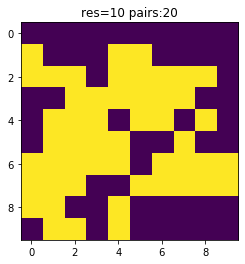

In [14]:
res = 10
pic,pairs,pic2 = draw_lune_heatmap(df,res,lat,log)
plt.title('res='+str(res)+' pairs:'+str(len(pairs)))
plt.grid(b=False)
plt.imshow(pic2)
print(pairs)
print(pic)

## 重复的点处理（当前方式，采用数据最多的点），较为粗略的处理方式

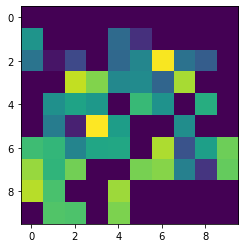

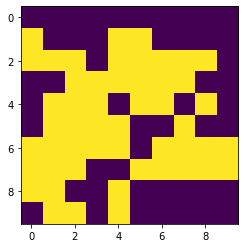

In [15]:
plt.imshow(pic)
plt.figure()
plt.imshow(pic2)

In [16]:
for pair in pairs:
    print(pair[0],pair[1])

14 [ 3 23 42]
15 [ 5 17]
24 [21 26 41]
25 [14 30 39 56]
26 [  9  15  18  24  37  44 105 121]
27 [12 45 46]
28 [ 8 25 36]
33 [64 75 99]
36 [13 40]
37 [ 34  43 106]
53 [ 70 122]
54 [49 68]
63 [66 72]
64 [54 73]
66 [ 32  35  50  94 107]
69 [79 95]
75 [92 97]
77 [33 53]
78 [10 19]
91 [85 89]


In [17]:
sub_prefix = 'sensorscope-meteo-'
sub_suffix = '.txt'
def concat_dataframe(num_list):
    # df_sum = pd.DataFrame()
    max_length = 0
    max_df = None
    max_num = 0
    for i,num in enumerate(num_list):
        file = ori_path+sub_prefix+str(num)+sub_suffix
        df = pd.read_csv(file,sep=' ',names=name)
        print(file,len(df))
        if len(df) > max_length:
            max_length = len(df)
            max_df = df
            max_num = i
    return max_df,max_num

In [30]:
df,num = concat_dataframe(pairs[1][1])

/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-5.txt 473401
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-17.txt 508058


In [19]:
num_list = []
for pair in pairs:
    print(pair[1])
    df,num = concat_dataframe(pair[1])
    num_list.append(np.delete(pair[1],num))

[ 3 23 42]
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-3.txt 463366
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-23.txt 508496
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-42.txt 476141
[ 5 17]
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-5.txt 473401
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-17.txt 508058
[21 26 41]
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-21.txt 516111
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-26.txt 523660
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-41.txt 492508
[14 30 39 56]
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-14.txt 507791
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-30.txt 459515
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-39.txt 498798
/home/esmidth/github/DCS/Sensorscope/luce_sta

In [21]:
print(num_list)

[array([ 3, 42]), array([5]), array([21, 41]), array([30, 39, 56]), array([  9,  15,  18,  24,  37,  44, 105]), array([12, 45]), array([25, 36]), array([64, 99]), array([13]), array([ 43, 106]), array([122]), array([68]), array([66]), array([54]), array([ 32,  50,  94, 107]), array([95]), array([92]), array([53]), array([10]), array([85])]


In [22]:
num_list = np.array(num_list)
new_list = num_list.squeeze()

In [23]:
print(num_list.shape)
print(new_list.shape)

(20,)
(20,)


In [24]:
new_list

array([array([ 3, 42]), array([5]), array([21, 41]), array([30, 39, 56]),
       array([  9,  15,  18,  24,  37,  44, 105]), array([12, 45]),
       array([25, 36]), array([64, 99]), array([13]), array([ 43, 106]),
       array([122]), array([68]), array([66]), array([54]),
       array([ 32,  50,  94, 107]), array([95]), array([92]), array([53]),
       array([10]), array([85])], dtype=object)

In [25]:
ab = []
for a in new_list:
    for b in a:
        ab.append(b)

In [26]:
print(sorted(ab),len(ab))

[3, 5, 9, 10, 12, 13, 15, 18, 21, 24, 25, 30, 32, 36, 37, 39, 41, 42, 43, 44, 45, 50, 53, 54, 56, 64, 66, 68, 85, 92, 94, 95, 99, 105, 106, 107, 122] 37


In [ ]:
print(pairs)

In [33]:
total=df_sum['Station ID'].values
diff = np.setdiff1d(total,ab)
print(diff,len(diff))

[  7   8  11  14  17  19  23  26  27  31  33  34  35  40  46  47  49  51
  55  57  59  60  61  62  63  65  69  70  71  72  73  75  76  79  80  81
  82  84  87  88  89  93  96  97  98 100 103 104 109 111 121] 51


In [35]:
np.unique(total)

array([  3,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  21,  23,  24,  25,  26,  27,  30,  31,  32,  33,  34,  35,
        36,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,
        51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  68,  69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,
        84,  85,  87,  88,  89,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 103, 104, 105, 106, 107, 109, 111, 121, 122])

In [37]:
len(np.unique(total))

88

In [38]:
df_sum

,Station ID,Year,Month,Day,Hour,Minute,Second,Time since the epoch [s],Sequence Number,Ambient Temperature,Surface Temperature,Solar Radiation,Relative Humidity [%],Soil Moisture [%],Watermark [kPa],Rain Meter [mm],Wind Speed [m/s],Wind Direction [°]
0,12,2006.0,11.0,1.0,16.0,9.0,47.0,1.162394e+09,44958.0,10.26,10.037,NaN,48.657,NaN,NaN,NaN,NaN,NaN
1,12,2006.0,11.0,1.0,16.0,10.0,16.0,1.162394e+09,44959.0,10.27,9.975,NaN,48.721,NaN,NaN,NaN,NaN,NaN
2,12,2006.0,11.0,1.0,16.0,10.0,45.0,1.162394e+09,44960.0,10.25,9.975,NaN,48.502,NaN,NaN,NaN,NaN,NaN
3,12,2006.0,11.0,1.0,16.0,11.0,15.0,1.162394e+09,44961.0,10.26,9.975,NaN,48.627,NaN,NaN,NaN,NaN,NaN
4,12,2006.0,11.0,1.0,16.0,11.0,44.0,1.162394e+09,44962.0,10.24,9.975,NaN,48.964,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255937,71,2007.0,5.0,9.0,23.0,57.0,52.0,1.178748e+09,15783.0,13.14,9.162,NaN,73.917,NaN,NaN,NaN,NaN,NaN
255938,71,2007.0,5.0,9.0,23.0,58.0,21.0,1.178748e+09,15784.0,13.10,9.412,NaN,73.698,NaN,NaN,NaN,NaN,NaN
255939,71,2007.0,5.0,9.0,23.0,58.0,51.0,1.178748e+09,15785.0,13.10,9.162,NaN,73.777,NaN,NaN,NaN,NaN,NaN
255940,71,2007.0,5.0,9.0,23.0,59.0,20.0,1.178748e+09,15786.0,13.08,9.100,NaN,73.852,NaN,NaN,NaN,NaN,NaN


In [39]:
diff

array([  7,   8,  11,  14,  17,  19,  23,  26,  27,  31,  33,  34,  35,
        40,  46,  47,  49,  51,  55,  57,  59,  60,  61,  62,  63,  65,
        69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,  84,  87,
        88,  89,  93,  96,  97,  98, 100, 103, 104, 109, 111, 121])

In [40]:
dfs = pd.DataFrame()
for dif in diff:
    file = ori_path+sub_prefix+str(dif)+sub_suffix
    df_tmp = pd.read_csv(file,sep=' ',names=name)
    dfs = pd.concat([dfs,df_tmp],axis=0)
    print(file,'Done',len(df_tmp),len(dfs))

/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-7.txt Done 131753 131753
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-8.txt Done 508506 640259
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-11.txt Done 474258 1114517
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-14.txt Done 507791 1622308
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-17.txt Done 508058 2130366
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-19.txt Done 468463 2598829
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-23.txt Done 508496 3107325
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-26.txt Done 523660 3630985
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-27.txt Done 122838 3753823
/home/esmidth/github/DCS/Sensorscope/luce_stations/sensorscope-meteo-31.txt Done 475734 4229557
/home/esmidth/github/DCS/Sensorscope/luce_st

In [41]:
print(dfs.info(memory_usage='Deep'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21797635 entries, 0 to 1268693
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Station ID                int64  
 1   Year                      int64  
 2   Month                     int64  
 3   Day                       int64  
 4   Hour                      int64  
 5   Minute                    int64  
 6   Second                    int64  
 7   Time since the epoch [s]  int64  
 8   Sequence Number           int64  
 9   Ambient Temperature       float64
 10  Surface Temperature       float64
 11  Solar Radiation           float64
 12  Relative Humidity [%]     float64
 13  Soil Moisture [%]         float64
 14  Watermark [kPa]           float64
 15  Rain Meter [mm]           float64
 16  Wind Speed [m/s]          float64
 17  Wind Direction [°]        float64
dtypes: float64(9), int64(9)
memory usage: 3.1 GB
None


In [42]:
dfs.to_hdf('data.h5',key='dfs',mode='w')
# df_tst.to_hdf('data.h5',key='dff',mode='w')

## 从hdf读取dataframe

In [40]:
dfs = pd.read_hdf('data.h5','dfs')
print(dfs.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457590 entries, 0 to 457589
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Station ID                457590 non-null  int64  
 1   Year                      457590 non-null  int64  
 2   Month                     457590 non-null  int64  
 3   Day                       457590 non-null  int64  
 4   Hour                      457590 non-null  int64  
 5   Minute                    457590 non-null  int64  
 6   Second                    457590 non-null  int64  
 7   Time since the epoch [s]  457590 non-null  int64  
 8   Sequence Number           457590 non-null  int64  
 9   Ambient Temperature       457313 non-null  float64
 10  Surface Temperature       421659 non-null  float64
 11  Solar Radiation           0 non-null       float64
 12  Relative Humidity [%]     457314 non-null  float64
 13  Soil Moisture [%]         0 non-null       f

In [ ]:
print(dfs['Wind Direction [°]'].describe())

In [ ]:
print(dfs['Wind Speed [m/s]'].shape[0])
print(dfs['Wind Speed [m/s]'].isna().sum())

In [41]:
# 统计 每一列 Nan的个数,百分比
print("na_percent:\t valid_nums \t column_name")
for column in dfs.columns:
    # print(column,dfs[column].isna().sum())
    na_num = dfs[column].isna().sum()
    total_num = dfs[column].shape[0]
    print("{1:.3f}%: \t {2} \t {0}".format(column,na_num*100/total_num,total_num-na_num))

na_percent:	 valid_nums 	 column_name
0.000%: 	 457590 	 Station ID
0.000%: 	 457590 	 Year
0.000%: 	 457590 	 Month
0.000%: 	 457590 	 Day
0.000%: 	 457590 	 Hour
0.000%: 	 457590 	 Minute
0.000%: 	 457590 	 Second
0.000%: 	 457590 	 Time since the epoch [s]
0.000%: 	 457590 	 Sequence Number
0.061%: 	 457313 	 Ambient Temperature
7.852%: 	 421659 	 Surface Temperature
100.000%: 	 0 	 Solar Radiation
0.060%: 	 457314 	 Relative Humidity [%]
100.000%: 	 0 	 Soil Moisture [%]
100.000%: 	 0 	 Watermark [kPa]
100.000%: 	 0 	 Rain Meter [mm]
100.000%: 	 0 	 Wind Speed [m/s]
100.000%: 	 0 	 Wind Direction [°]


In [43]:
df_sub = dfs.drop(['Solar Radiation','Soil Moisture [%]','Watermark [kPa]','Rain Meter [mm]','Wind Speed [m/s]','Wind Direction [°]'],axis=1)

In [44]:
df_sub.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21797635 entries, 0 to 1268693
Data columns (total 12 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Station ID                int64  
 1   Year                      int64  
 2   Month                     int64  
 3   Day                       int64  
 4   Hour                      int64  
 5   Minute                    int64  
 6   Second                    int64  
 7   Time since the epoch [s]  int64  
 8   Sequence Number           int64  
 9   Ambient Temperature       float64
 10  Surface Temperature       float64
 11  Relative Humidity [%]     float64
dtypes: float64(3), int64(9)
memory usage: 2.1 GB


In [45]:
print(df_sub.shape)
print(dfs.shape)

(21797635, 12)
(21797635, 18)


In [ ]:
dfs.to_hdf('data_ori.h5',key='dfs',mode='w')

In [46]:
df_sub.to_hdf('data.h5',key='df_sub',mode='w')

In [ ]:
dfs.drop(['Wind Direction [°]'],axis=1)